C:\Users\gauta\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.1753 - loss: 4.5799 - val_accuracy: 0.2568 - val_loss: 2.1965
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2683 - loss: 2.1490 - val_accuracy: 0.2918 - val_loss: 2.0886
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.2785 - loss: 2.1010 - val_accuracy: 0.2708 - val_loss: 2.1645
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2930 - loss: 2.0703 - val_accuracy: 0.2875 - val_loss: 2.0605
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3018 - loss: 2.0370 - val_accuracy: 0.3175 - val_loss: 2.0100
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3138 - loss: 2.0193 - val_accuracy: 0.3072 - val_loss: 2.0152
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3181 - loss: 2.0030 - val_accuracy: 0.3162 - val_loss: 2.0363
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3189 - loss: 1.9953 - val_accuracy

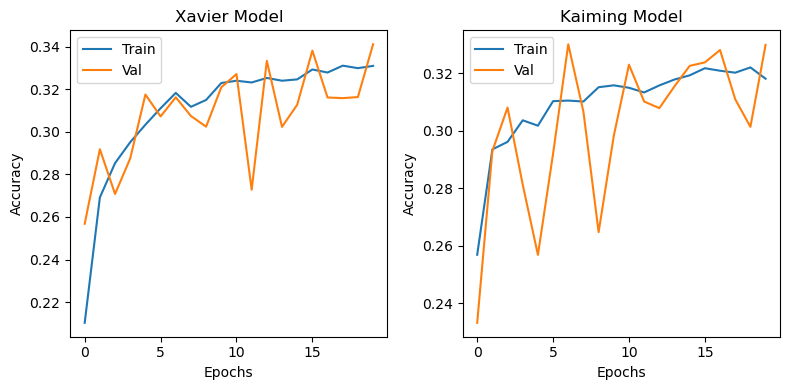

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers,initializers
from tensorflow.keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()
X_train=X_train/255
X_test=X_test/255
y_train_cat=to_categorical(y_train,num_classes=10)
y_test_cat=to_categorical(y_test,num_classes=10)

def Create_Model(Units,Activation,Regularizer,Initializer):
    model=Sequential()
    model.add(Flatten(input_shape=(32,32,3)))
    for i in Units:
        model.add(Dense(units=i,activation=Activation,kernel_regularizer=Regularizer,kernel_initializer=Initializer))
    model.add(Dense(units=10,activation='softmax'))
    return model

Xavier_Model=Create_Model([256,256,128,64,32],'relu',regularizers.L2(0.01),initializers.glorot_normal())
Kaiming_Model=Create_Model([256,256,128,64,32],'relu',regularizers.L2(0.01),initializers.he_normal())

Xavier_Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Kaiming_Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

X_history=Xavier_Model.fit(X_train,y_train_cat,epochs=20,validation_split=0.2,batch_size=64,verbose=1)
K_history=Kaiming_Model.fit(X_train,y_train_cat,epochs=20,validation_split=0.2,batch_size=64,verbose=1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Xavier Model')
plt.plot(X_history.history['accuracy'],label='Train')
plt.plot(X_history.history['val_accuracy'],label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.title("Kaiming Model")
plt.plot(K_history.history['accuracy'],label='Train')
plt.plot(K_history.history['val_accuracy'],label='Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()